# Shilpi Dubey
Data Science & Business Analytics Intern @GRIP - The Sparks Foundation




### TASK 1
Prediction using Supervised ML

### Objective:
Predict the percentage of students based on number of study hours.
This is a SIMPLE LINEAR REGRESSION analysis task which involves only two variables.
What will be predicted score if a student studies for 9.25 hrs/ day?


#### Installing necessary packages and importing libraries

In [20]:
library(readr)
library(dplyr)
library(caret)
library(Metrics)
library(stats)

#### Importing dataset

In [2]:
students_data <- read.csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print("Data successfully imported")
students_data

[1] "Data successfully imported"


Hours,Scores
2.5,21
5.1,47
3.2,27
8.5,75
3.5,30
1.5,20
9.2,88
5.5,60
8.3,81
2.7,25


In [3]:
head(students_data)

Hours,Scores
2.5,21
5.1,47
3.2,27
8.5,75
3.5,30
1.5,20


In [4]:
tail(students_data)

,Hours,Scores
20,7.4,69
21,2.7,30
22,4.8,54
23,3.8,35
24,6.9,76
25,7.8,86


In [5]:
summary(students_data)

     Hours           Scores     
 Min.   :1.100   Min.   :17.00  
 1st Qu.:2.700   1st Qu.:30.00  
 Median :4.800   Median :47.00  
 Mean   :5.012   Mean   :51.48  
 3rd Qu.:7.400   3rd Qu.:75.00  
 Max.   :9.200   Max.   :95.00  

#### Checking for NAs

In [6]:
table(is.na(students_data))


FALSE 
   50 

#### Checking for outliers

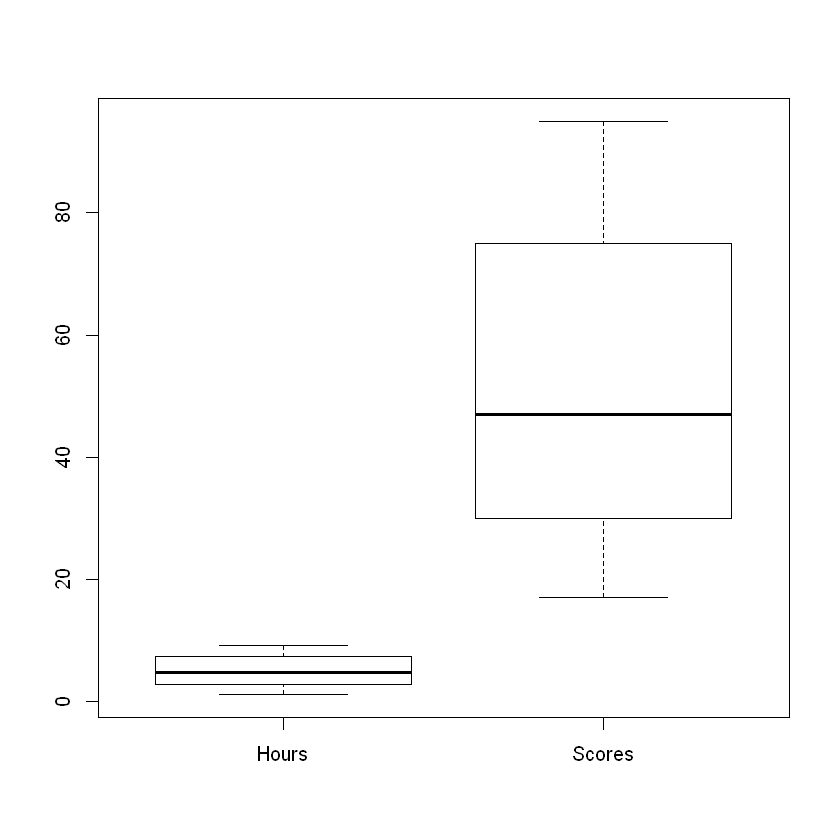

In [7]:
boxplot(students_data)

#### Visualizing the data 

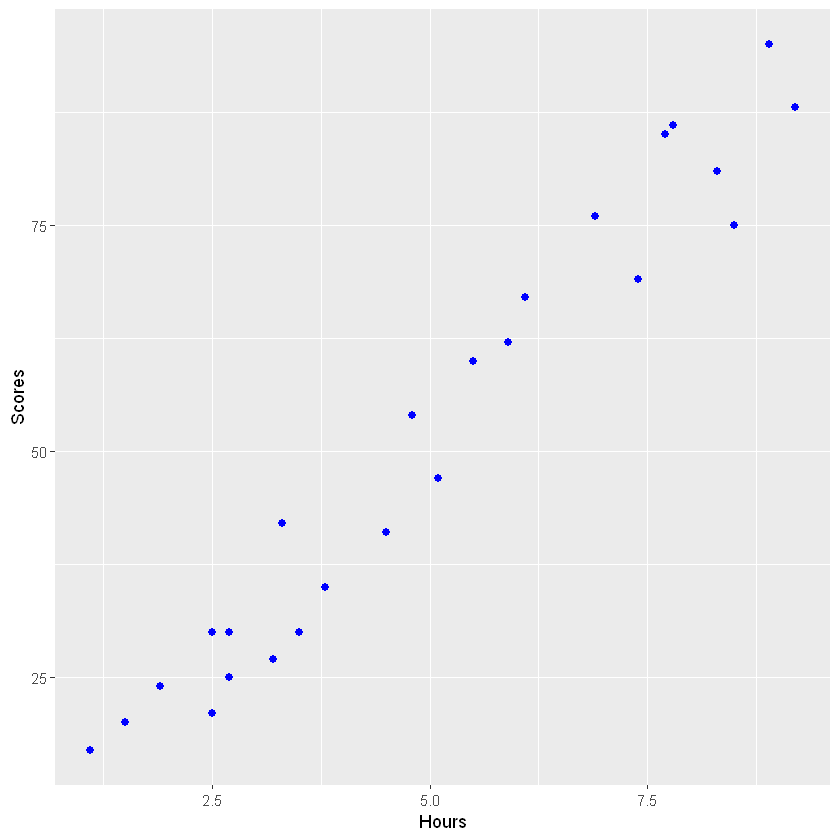

In [8]:
students_data %>% ggplot(aes(x=Hours, y=Scores)) +geom_point(color = "blue", size = 2)

#### Splitting the dataset into training and testing data 

In [9]:
set.seed(234)
train_index <- createDataPartition(students_data$Scores, p=0.7, list = FALSE)
training_data <- students_data[train_index,]
testing_data <- students_data[-train_index,]

#### Training of data

In [10]:
model <- lm(formula = Scores~Hours, data = training_data)
model
print("Training finished")


Call:
lm(formula = Scores ~ Hours, data = training_data)

Coefficients:
(Intercept)        Hours  
      1.263       10.067  


[1] "Training finished"


#### Plotting the regression line on training data

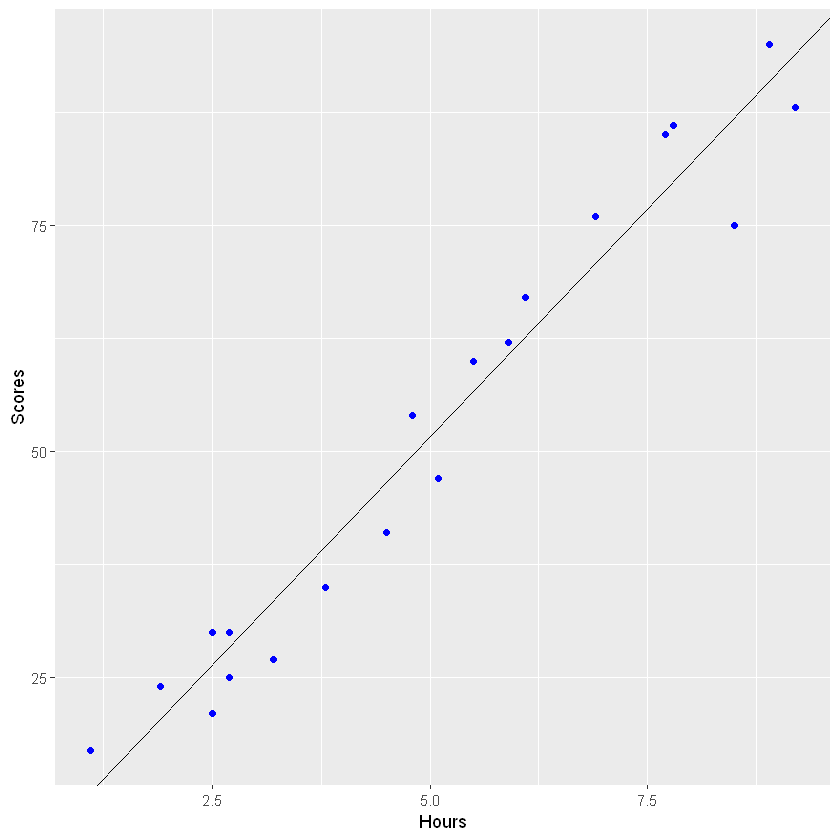

In [11]:
training_data %>% ggplot(aes(x=Hours, y=Scores)) + 
  geom_point(color = "Blue") + geom_abline(slope=model$coefficients[2], intercept = model$coefficients[1])

#### Prediction on testing data

In [12]:
prediction <- predict(model, testing_data)
prediction

5        6        9       14       20 
36.49576 16.36254 84.81548 34.48244 75.75553

#### Plotting regression line on testing data

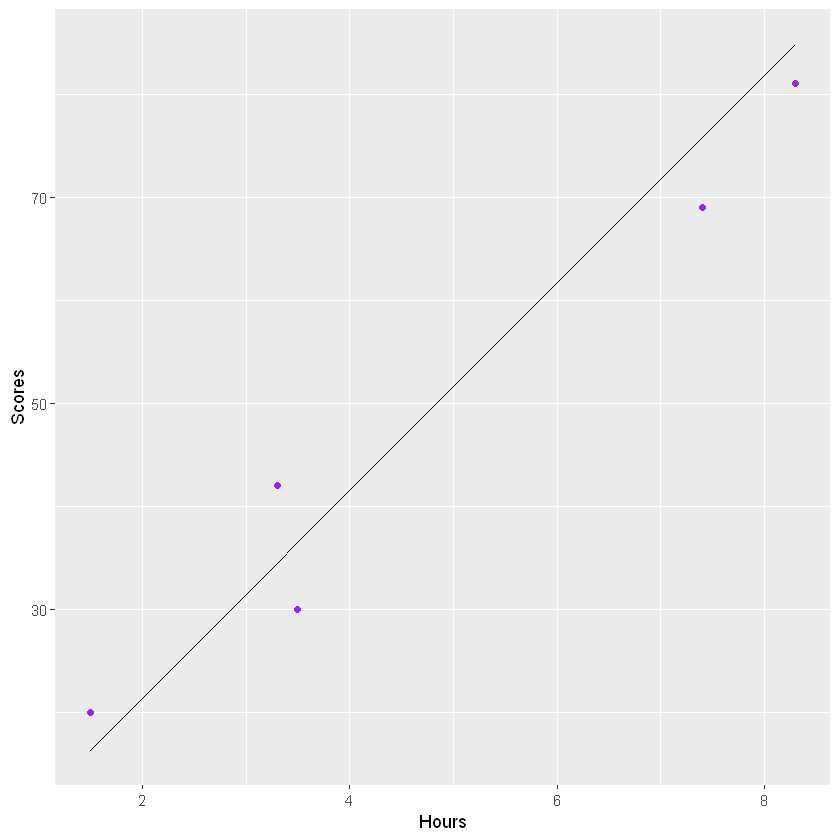

In [13]:
testing_data %>% ggplot(aes(x=Hours, y= Scores, color="green")) +geom_point(color="purple") +
  geom_line(aes(x=Hours, y= prediction), color = "black")

#### Comparing actual vs predicted score

In [14]:
data.frame(actual=testing_data$Scores, predicted = prediction)

,actual,predicted
5,30,36.49576
6,20,16.36254
9,81,84.81548
14,42,34.48244
20,69,75.75553


#### Accuracy of the Model

In [15]:
R2(prediction, testing_data$Scores)

[1] 0.9613637

#### Predicting the error

In [16]:
MSE <- mean((testing_data$Scores-prediction)^2)
MAE <- MAE(prediction,testing_data$Scores)
RMSE <- RMSE(prediction, testing_data$Scores)
paste("Mean Squared Error = ",MSE)
paste("Mean Absolute Error = ", MAE)
paste("Root Mean Squared Error = ",RMSE)

[1] "Mean Squared Error =  34.4269466027825"

[1] "Mean Absolute Error =  5.64435623247032"

[1] "Root Mean Squared Error =  5.86744804857977"

#### Predicting the score

In [17]:
no_of_hours = 9.25
predicted_Score = model$coefficients[1] + model$coefficients[2]*no_of_hours
paste("Predicted score of student studying 9.25 hrs/day = ",predicted_Score)

[1] "Predicted score of student studying 9.25 hrs/day =  94.3787524546804"

# CONCLUSION:
From this, we can conclude that if a student studies for 9.25 hrs/day then he/she will secure 94.37 marks.

### Thank you!!